#**Introduction**

##**Auto-Mpg data analysis with the application of PCA**

Welcome to our case study centered around the AutoMPG dataset. Throughout this study, we will delve into the relationships among different variables using both univariate and multivariate analyses.

To enhance our understanding of the data and unveil potential patterns, we will utilize Principal Component Analysis (PCA) to reduce the dataset's complexity. PCA serves a dual role: it makes the data more understandable and minimizes any loss of information. By pinpointing the most influential features. PCA also simplifies the visualization of data in 2D and 3D, helping us uncover hidden patterns and valuable insights.

In the final stages, we will leverage Principal Components to construct our regression model, illustrating how PC can significantly aid in the process of building effective models.
##**Our dataset comprises of following 8 variables.**

-----------------------------
## Dataset:
-----------------------------

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name

##**The structure of this notebook is as follows:**

- First, we will start off by loading and viewing the dataset.
- We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.
- We will have to preprocess the dataset.
- After our data is in good shape, we will do some exploratory data analysis to build our intuitions.
- Finally, we will do data analysis using PCA.

##**1) Settup colab notebook and import auto-mpg dataset.**

In [70]:
# import drive from googlecolab to pull files from my Google Drive account into my Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I will import all the required libraries that come with the tools and functions necessary for our data analysis tasks.

In [71]:
#import the necessary libraries

#Import pandas
import pandas as pd

#import numpy
import numpy as np

#import pyplot
import matplotlib.pyplot as plt

#import seaborne
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

#import PCA (Principle Component Analysis)
from sklearn.decomposition import PCA

# To supress warnings
import warnings
warnings.filterwarnings("ignore")


Now with our Colab notebook ready to roll and our toolkit fully loaded, it's time to bring in the Auto-MPG dataset.

In [72]:
# Read in `auto-mpg.csv`
data = pd.read_csv("/content/drive/MyDrive/MIT - Python/auto-mpg.csv")

Our dataset is all set and snug, let's embark on our journey of exploration. We'll start peeling back the layers to uncover its hidden treasures and insights.

##**2) Read in and get an overview of the data.**

In [73]:
data.shape

(398, 8)

In [74]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [76]:
data.duplicated().sum()

0

In [77]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

In [78]:
for column in data.columns:
  print("*"*50)
  print(f"\n{column}")
  print("number of missing value in ",column,data[column].isnull().sum())# checking for the missing value in each column
  print("number of unique entries in ",column, data[column].nunique(),"\n")# checking for the unique entries in each column


**************************************************

mpg
number of missing value in  mpg 0
number of unique entries in  mpg 129 

**************************************************

cylinders
number of missing value in  cylinders 0
number of unique entries in  cylinders 5 

**************************************************

displacement
number of missing value in  displacement 0
number of unique entries in  displacement 82 

**************************************************

horsepower
number of missing value in  horsepower 0
number of unique entries in  horsepower 94 

**************************************************

weight
number of missing value in  weight 0
number of unique entries in  weight 351 

**************************************************

acceleration
number of missing value in  acceleration 0
number of unique entries in  acceleration 95 

**************************************************

model year
number of missing value in  model year 0
number of unique entries 

In [79]:
list = ["cylinders","model year"]

In [80]:
for i in list:
  print("\nUnique value count for variable" ,i," are",data.groupby(i)[i].count())#checking for the uniques cylinder count and year span of the data.


Unique value count for variable cylinders  are cylinders
3      4
4    204
5      3
6     84
8    103
Name: cylinders, dtype: int64

Unique value count for variable model year  are model year
70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: model year, dtype: int64


After doing a first orientation of data to get to know the data with which we are dealing, we dedced following findings:
1. Our data is made up of 398 observations and 8 variables.
2. All the variables of the data are numerical except horsepower and car name.
3. There is no missing value in any of the columns.
4. There is no duplicate entry in the data.
5. Our car data is from year 70s to 82s.
6. maximum number of cylinders are 8 and minimum are 3, we will see later how this cahnge in nuber of cylinder affects our miles per gallons(mpg).
7. One thing worth pointing out from above data overview is, our horse power entries are numerical type but the variable itself is object type, We should do some digginf here to find out if this vaibale has some jibberish entries.



In [81]:
# checking if there are values other than digits in the column 'horsepower'
hpIsDigit = pd.DataFrame(data['horsepower'].str.isdigit())  # if the string is made of digits store True else False
#print isDigit = False!
data[hpIsDigit['horsepower'] == False]# from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
32,25.0,4,98.0,?,2046,19.0,71,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,amc concord dl


Ok, so intersitingly there are some gibberish rows that have gibberish entries in horsepoer column. Our next action will be to
1. Replacing ? with np.nan
1. replace this entry with legitimate values and
2. then convert the data type of this variable form object to integer.

In [82]:
#Relacing ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
32,25.0,4,98.0,NaN,2046,19.0,71,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,amc concord dl


To replace all the odd entries we will check for the distribution of values in horsepower column using boxplot and distribution curve.

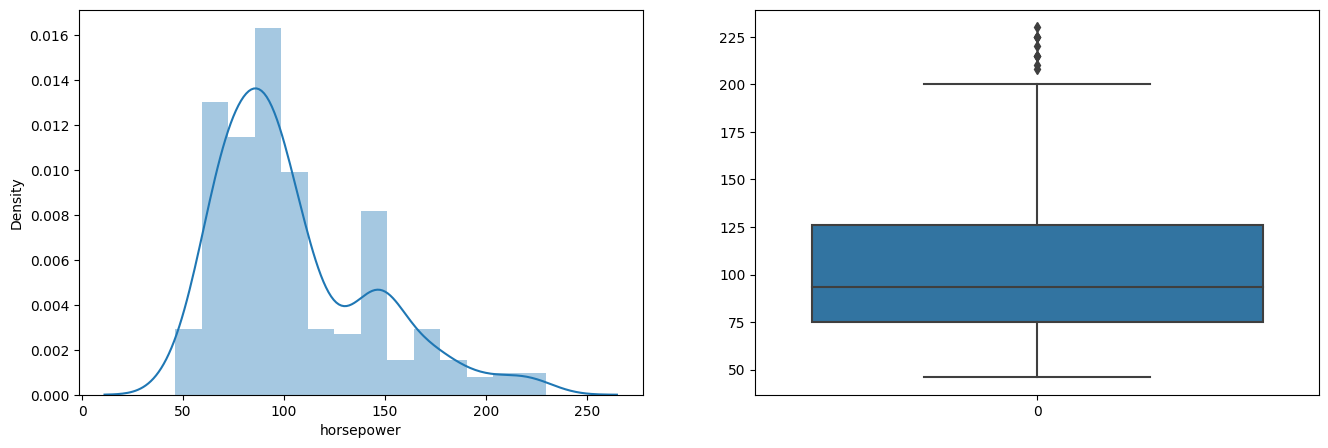

In [83]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data["horsepower"])

plt.subplot(1,2,2)
sns.boxplot(data['horsepower'])

plt.show()

As can be seen from the distibution plot and box plot, that the data is right skewed, which implies mean of data is bigger than median, in such case it is always better to impute the missing values with the median, and that is what we are going to do.

In [84]:
# Imputing the missing values with median value
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object data type to float

The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [85]:
data=data.drop(["car name"], axis= 1)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


#**3. Create a textual and a graphical summary of the data.**

We now have an idea of what the dataset looks like. To further familiarize ourselves with this data, we will calculate summary statistics and produce a graphical overview of the data. The graphical overview is good to get a sense for the distribution of variables and outliers within the data and could consist of one histogram and one boxplot per column.

In [87]:
# Compute the summary statistics of all columns in the `car_acc` DataFrame
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


#**Findings:**

1. The average miles per gallon (MPG) for the cars in the dataset is approximately 23 MPG.
2. The average number of cylinders in the cars is approximately 5.
3. The average displacement of the engines is around 193 cubic inches, with a standard deviation of approximately 104 cubic inches, indicating significant variation in engine sizes.
4. The average horsepower of the cars is 104.
5. The average weight of the cars is approximately 2970 pounds.
6. The average acceleration time for the cars to reach 0 to 60 mph speed is approximately 15 seconds.
7. The dataset covers cars from model years ranging from 1970 to 1982, indicating a span of 12 years.






mpg
Skew : 0.46


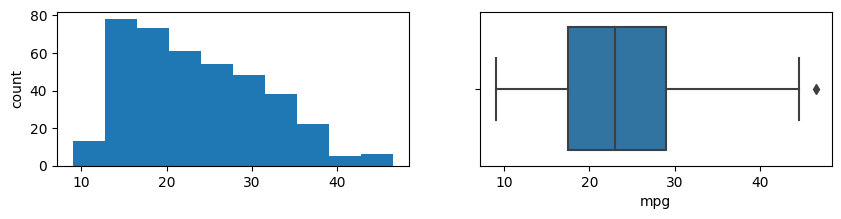

cylinders
Skew : 0.53


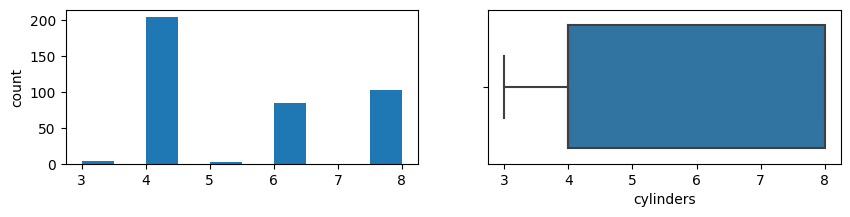

displacement
Skew : 0.72


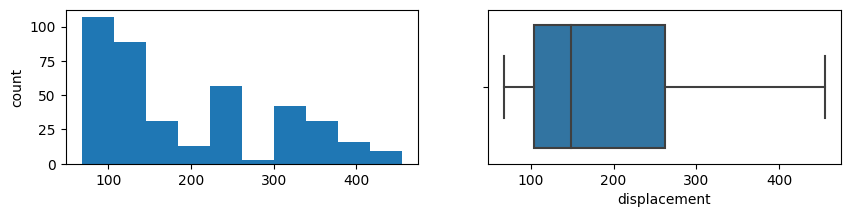

horsepower
Skew : 1.11


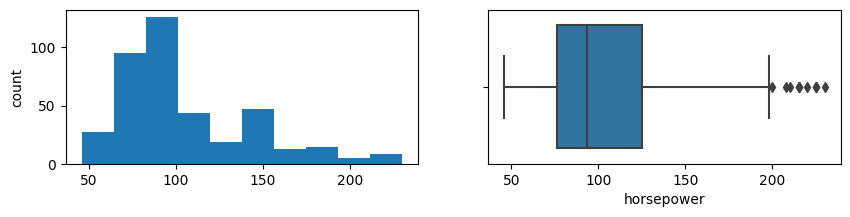

weight
Skew : 0.53


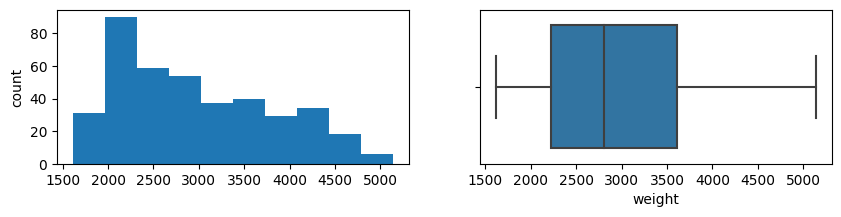

acceleration
Skew : 0.28


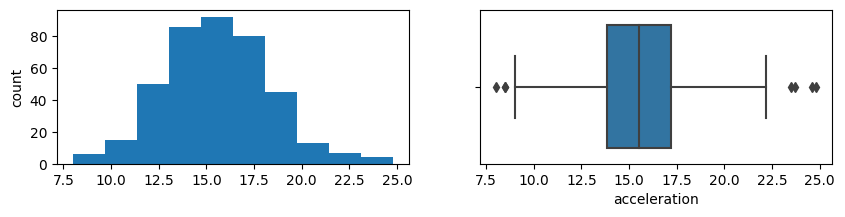

model year
Skew : 0.01


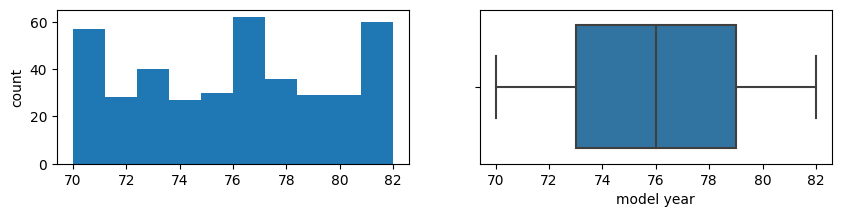

In [88]:
#Let's check the distribution and outliers for each column in the data
%matplotlib inline
for col in data.columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(10,2))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**
- The mpg, displacement, weight columns are right skewed.
- The most common number of cylinders is 4.
- The acceleration is normally distributed.
- Most number of cars are 76 or 77 year model.
- mpg, horsepower and acceleration has some outliers but we will leave them as it is because outliers in real world is possible for these variables.

It's also advisable often times to further investigate the interrelationships between all columns within the dataset by creating pairwise scatter plots, commonly known as a "scatterplot matrix." Additionally, examining the correlation matrix will provide insights into how variables influence each other and which feature strongly correlates with "mpg."

<Figure size 400x400 with 0 Axes>

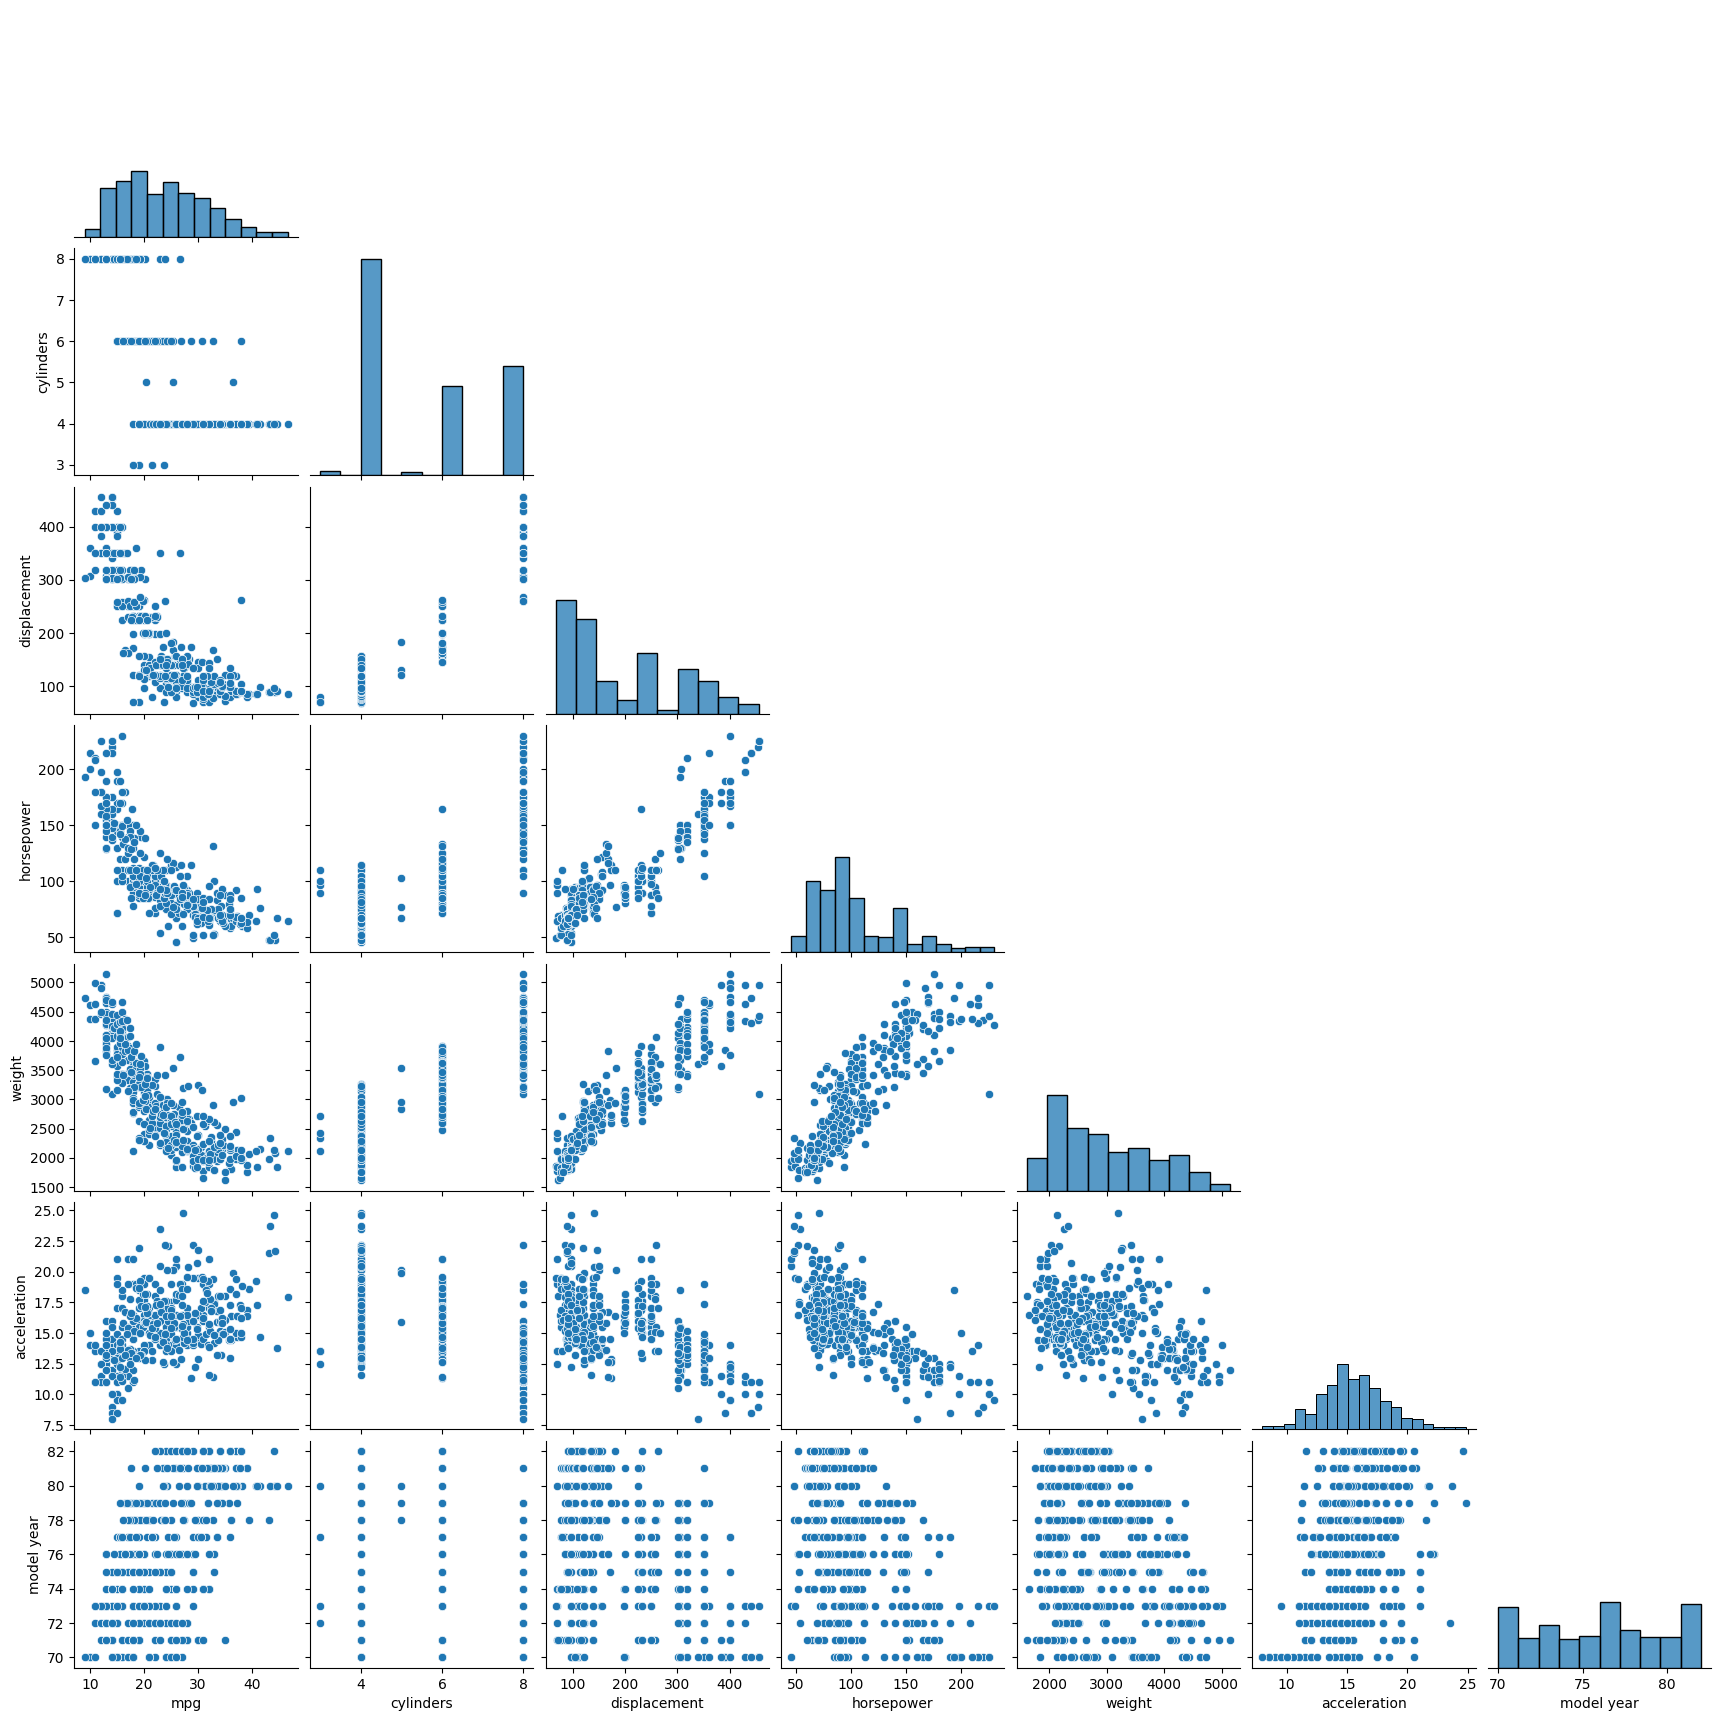

In [89]:
# Create a pairwise scatter plot to explore the data
%matplotlib inline
plt.figure(figsize=(4,4))
sns.pairplot(data=data, vars=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year'],corner=True)

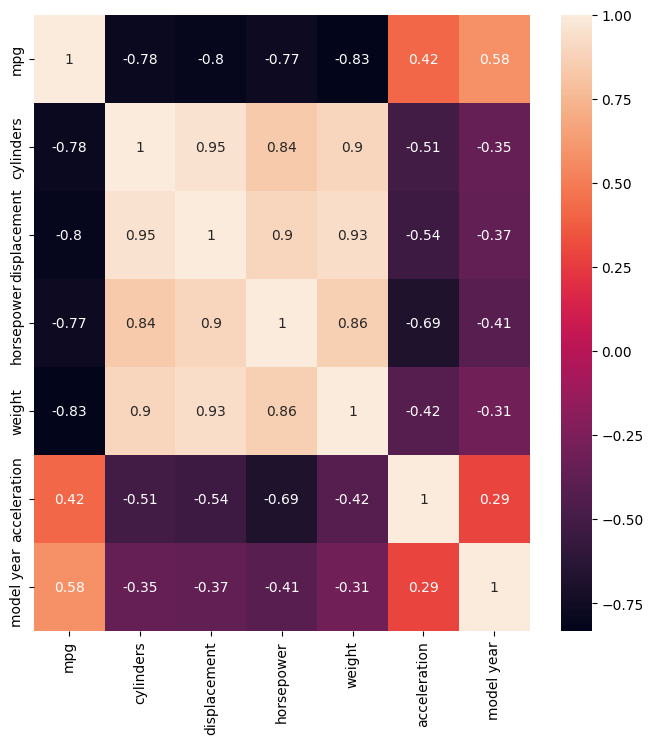

In [90]:
#checking correlation
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

#Findings:-
1. mpg is very highly negatively correlated with weight,displacement, horsepower, and cylinders, as can be seen from the scatter plot, with increase in the value is these variable, there is steep decrease in the mpg.
2. whereas mpg is positively correlated with acceleration, that mean if acceleration of the car increases it can cover more miles per gallon.
3. also as can be seen from the heat map, over the years miles pergallon has increased, it hints towrads the advancements in car engines efficieny with each passing year.
4. if we compare the cylinder variable, it is positively correlated with weight horsepower and displacement, with incrase in these varibale values, when number of cylinder in the car increases, then its weight horsepower and displacement also increases.
5. one strange observation is that with incease in horsepower the acceleration is decreasing which is pretty weird, but the relationship between acceleration and horsepower is not linear and depends on several other factors. One of the critical factors affecting acceleration is the power-to-weight ratio. This ratio compares the car's power (horsepower) to its weight. A higher power-to-weight ratio generally leads to better acceleration. For example, a lightweight sports car with moderate horsepower may accelerate faster than a heavier car with higher horsepower.
6. intrestingly when we fit the linear regressio model to this problem we may get different coeeficients.

#**4. Fit a multivariate linear regression**

From the correlation table, we see that the mpg is most strongly negatively correlated with weight, displacement, horsepower, and cylinders. But in addition, we also see that some of the features are correlated with each other, for instance, acceleration is negatively correlated with number of cylinder and horsepower. We, therefore, want to compute the association of the target with each feature while adjusting for the effect of the remaining features. This can be done using multivariate linear regression.

Both the multivariate regression and the correlation measure how strongly the features are associated with the outcome (mpg). When comparing the regression coefficients with the correlation coefficients, we will see that they are slightly different. The reason for this is that the multiple regression computes the association of a feature with an outcome, given the association with all other features, which is not accounted for when calculating the correlation coefficients.

A particularly interesting case is when the correlation coefficient and the regression coefficient of the same feature have opposite signs. How can this be? For example, when a feature A is positively correlated with the outcome Y but also positively correlated with a different feature B that has a negative effect on Y, then the indirect correlation (A->B->Y) can overwhelm the direct correlation (A->Y). In such a case, the regression coefficient of feature A could be positive, while the correlation coefficient is negative. This is sometimes called a masking relationship. Let’s see if the multivariate regression can reveal such a phenomenon.

In [91]:
# Create the features and target DataFrames
X = data.drop(['mpg'],axis=1)
y = data['mpg']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Import the linear model function from sklearn
from sklearn import linear_model

# Create a linear regression object
reg = linear_model.LinearRegression()

# Fit a multivariate linear regression model
reg.fit(X_train,y_train)

#Predicit mpg for test set
y_predict = reg.predict(X_test)

#Calculate mse
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_predict)
print(R2)


# Retrieve the regression coefficients
fit_coef = reg.coef_
print(fit_coef)

0.8244245330943356
[ 0.06904916  0.00160356  0.00289823 -0.0070437   0.08061413  0.80136485]


In [92]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year'],
      dtype='object')

***Important Point**

It is interesting to note that, over the years, miles per gallon (MPG) has shown an increase alongside the rise in other variables such as the number of cylinders, horsepower, and acceleration, with one exception being weight. This means that as the number of cylinders, horsepower, or acceleration increases, a car's MPG also increases, indicating that the vehicle can cover more miles with one gallon of fuel.

However, these outcomes might seem counterintuitive in real-life scenarios. To make sense of this, it's crucial to consider another variable in the dataset: model year. The presence of this variable suggests that advancements in automobile technologies have been occurring over the years. Factors such as efficiency enhancements, advanced fuel injection systems, aerodynamic design, and transmission technology have contributed to the increase in MPG.

Modern engineering and technology advancements have allowed for a more nuanced relationship between cylinder count and mpg, and manufacturers can design engines to strike a balance between all the other features while adjusting the power and efficiency based on consumer preferences and intended use.

To draw more accurate conclusions, further data related to these variables is necessary. Additional information would enable better predictions and a deeper understanding of the relationship between these factors and fuel efficiency

Additionally, it's important to acknowledge the presence of covariance among the independent variables. Understanding that variables can influence each other's outcomes is important. This mix, called covariance, can make predictions less reliable. To deal with this, we use Principal Component Analysis (PCA). PCA helps us find the main patterns in the data, making our predictions better.

Also, it's good to know that PCA creates components that don't influence each other i.e they have 0 covariance amongst themselves. This means we can use these components in predictions more confidently

**PCA to the rescue**

One way of clustering the data is to use PCA to visualize data in reduced dimensional space where we can try to pick up patterns by eye. PCA uses the absolute variance to calculate the overall variance explained for each principal component, so it is important that the features are on a similar scale (unless we would have a particular reason that one feature should be weighted more).

#**5. Perform PCA on standardized data**

We'll use the appropriate scaling function to standardize the features to be centered with mean 0 and scaled with standard deviation 1.

In [93]:
 #Standardize and center the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_trf = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_trf = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Import the PCA class function from sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=6)


X_train_PCA = pd.DataFrame(pca.fit_transform(X_train_trf))
X_test_PCA = pd.DataFrame(pca.transform(X_test_trf))


In [94]:
#variance explained by each eigenvector, i.e. eigenvalue of each eigenvector
pca.explained_variance_

array([4.23531917, 0.83506981, 0.70658719, 0.13886536, 0.06601706,
       0.03706886])

In [95]:
pca.explained_variance_ratio_ #cumulative variance by eigenvectors.

array([0.70366676, 0.13874063, 0.1173942 , 0.02307145, 0.01096824,
       0.00615872])

In [96]:
variance = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative Explained Variance')

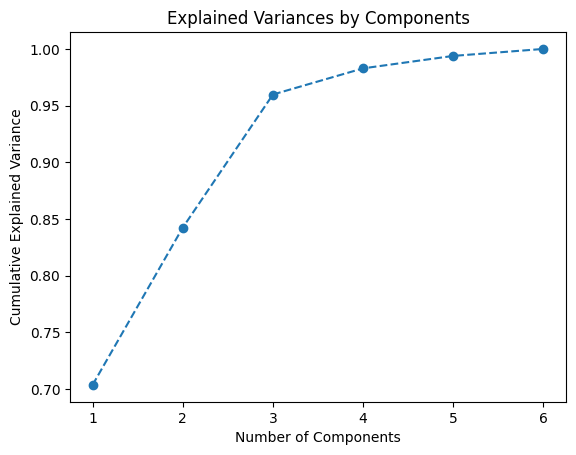

In [97]:
# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.plot(range(1, pca.n_components_ + 1), variance, marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")


By looking at above scree plot, it is very clear that atleast 3 PCAs explaines more than 90% of variance.

In [98]:
#eigen vector
pca.components_

array([[ 0.45745224,  0.46996733,  0.46338061,  0.44562812, -0.31334556,
        -0.24161271],
       [ 0.1947713 ,  0.18137705, -0.00307711,  0.30231259,  0.32076811,
         0.85724673],
       [ 0.140535  ,  0.10913494, -0.13638423,  0.22682498,  0.83520397,
        -0.44802186],
       [-0.637456  , -0.21244812,  0.64344636,  0.33000798,  0.15914087,
         0.0161662 ],
       [ 0.30473366,  0.00120563,  0.58843771, -0.69330043,  0.27312849,
         0.07491563],
       [-0.48356875,  0.83017287, -0.07991326, -0.26268302,  0.0378381 ,
         0.01241211]])

Above values depicts there are 6 eigenvectors in 6 dimension.

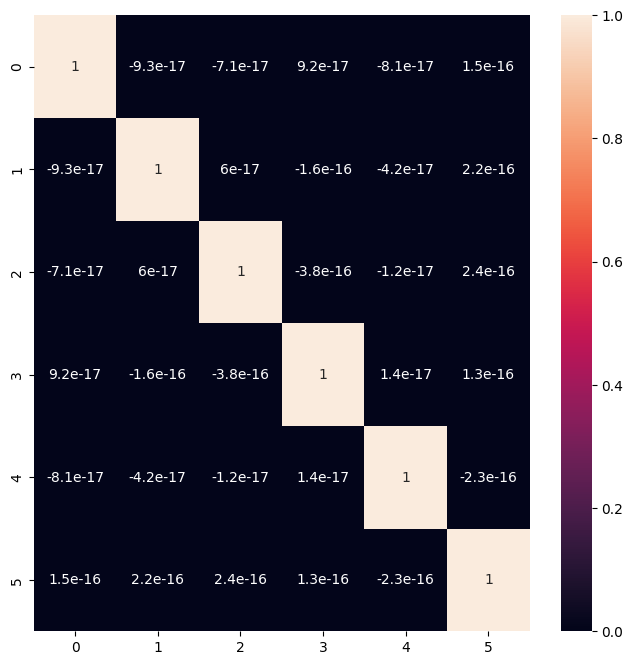

In [99]:
#checking correlation between Principle components.
plt.figure(figsize=(8,8))
sns.heatmap(X_train_PCA.corr(), annot=True)
plt.show()

Wow! Principle components have 0 correlation,hence dimishing the multicollineraty problem.

In [100]:
components = ["PC1","PC2","PC3"]
ds = pd.DataFrame(np.round(pca.components_[:3,:],2),index = components, columns = X_test.columns)#get the loadings of each variable on each PCA
ds.T

,PC1,PC2,PC3
cylinders,0.46,0.19,0.14
displacement,0.47,0.18,0.11
horsepower,0.46,-0.00,-0.14
weight,0.45,0.30,0.23
acceleration,-0.31,0.32,0.84
model year,-0.24,0.86,-0.45


**Uncorrelated Principal Components:**
The three principal components we identified exhibit complete independence, showcasing a covariance matrix with all 0 values. This unique feature signifies their ability to capture diverse facets of the dataset without overlap.

**PCA1 Insights:**
Delving into PCA1, we notice an intriguing alignment in the loading values. Cylinders, displacement, horsepower, and weight display remarkably similar linear combination values within this component. This uniformity hints at a strong correlation among these variables. PCA1 thus emerges as a powerful discerning tool, spotlighting the intricate relationships within this cluster of attributes.

**PCA2's Temporal Focus:**
PCA2, on the other hand, places significant emphasis on the 'model year' variable. Its substantial weighting of model year means that as this variable increases, PC2's influence expands proportionately. In essence, PC2 becomes a dynamic compass, navigating us through the dataset's temporal dimensions, offering a vivid portrayal of different model years and their impact.

**PC3 and Acceleration:**
Extending our exploration, we find PC3's primary contribution lies in the 'acceleration' variable. This indicates that PC3 captures the nuances of acceleration patterns within the dataset. By understanding these intricacies, we gain a deeper insight into the factors influencing the vehicle's speed changes, contributing a vital layer to our analysis.

In [101]:
import plotly.express as px
cylinders = X_train["cylinders"].astype(str)
fig = px.scatter(x=X_train_PCA.iloc[:,0],
                 y=X_train_PCA.iloc[:,1],
                 color = cylinders,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

5 clusters of cylinders are present, where cluster of cylinder 3 and 4 is highly ovelapping, but if we toggle the switch on the graph for the cylinders, we will see that cylinder 8 and cylinder 3 are forming clusters that are far apart from each other.

Cluster of cylinder 4, 3 and 5 overlaps a bit.

But cluster of cylinder 3 and 6  also have considerable distance between them.

Now since we have seen that 3 PCA components can explain more than 90% of the variance in the data, we will again apply the Multiple linear regresion algorith to predict mpg by using 3 PCs that means we will cme down  from 6 dimensional space to 3 dimensional space, we reduce the dimensionality by 50 %.

In [102]:
lr_PCA_3D = linear_model.LinearRegression()
lr_PCA_3D.fit(X_train_PCA.iloc[:,:3],y_train)
y_3D_predict = lr_PCA_3D.predict(X_test_PCA.iloc[:,:3])

R2 = r2_score(y_test,y_3D_predict)
print(R2)

# Retrieve the regression coefficients
fit_coef1_3D = lr_PCA_3D.coef_
print(fit_coef1_3D)

0.8063631283549195
[-3.22032516  0.80771772 -2.42710122]


In [103]:
# Retrieve the regression coefficients
fit_coef2 = lr_PCA_3D.coef_
print(fit_coef2)

[-3.22032516  0.80771772 -2.42710122]


#**Outcome**
Even though the R2 value decreased slightly to 80% when we used only 3 Principal Components instead of all 6 independent variables, the important thing to note is that cutting the dimensions in half still resulted in a well-fitting model. We successfully simplified the model significantly while keeping it accurate, making it a valuable trade-off.


#**Implications for Modeling:**
These distinct roles of the principal components pave the way for constructing a nuanced and comprehensive regression model. By recognizing the unique dimensions captured by each component, our model not only incorporates the complexities of engine attributes but also traces the dataset's historical evolution and deciphers acceleration patterns. This holistic approach ensures our model's depth, promising a robust analysis of the AutoMPG dataset.


Dealing with complex, high-dimensional data can be daunting, but Principal Component Analysis (PCA) comes to the rescue. It's a powerful tool that helps us handle this complexity. By condensing the data into just a few key dimensions, PCA simplifies our approach without losing crucial information. This reduction not only makes the data more manageable but also enhances our understanding. PCA has proven its effectiveness in the world of machine learning, transforming intricate multidimensional data into a format that's much easier to grasp. This streamlined approach ensures promising outcomes in our model building efforts.

#**Wrap up note**

A good project, I am truly amazed at the depth of knowledge I have gained throughout this learning experience. While I had a theoretical understanding of PCA, delving into its practical application, visualizing intricate datasets, and constructing meaningful models has truly solidified my grasp of this complex concept.

Throughout this process, I found myself revisiting fundamental notions such as vector decomposition, matrix transformation, eigenvalues, and eigenvectors. This revisitation was not just a review; it was a refreshing plunge into the depths of my understanding.

Also the outcome of our model stands as a testament to the remarkable power of PCA. It’s not merely a tool; it’s a transformative force that unravels complexities, shapes insights, and paves the way for sophisticated understanding.




